## 🧠 Qiskit Fall Fest 2025 – Workshop 3: Quantum Algorithms in Action
Presented by: Asfand Yar – Lead Organizer & Instructor of Quantum Computing, University of Debrecen

## 🧩 Bernstein–Vazirani Algorithm

In this section, we will explore one of the earliest and simplest demonstrations of quantum speed-up — the Bernstein–Vazirani Algorithm.
Using Qiskit, you’ll see how a quantum circuit can determine a hidden binary string in just one query, whereas a classical algorithm would require multiple attempts.

Through this exercise, participants will:

Understand the Bernstein–Vazirani problem and its logic.

Implement the algorithm using Qiskit 2 simulators.

Observe how quantum computation efficiently extracts hidden information.

**First we have to install all the packages and dependecies required for Quantum computing Lab**

In [ ]:
!pip install qiskit==1.2.4 qiskit-aer==0.15.1 qiskit-machine-learning==0.8.0 matplotlib seaborn pylatexenc


## Step 1: Import Required Libraries

In [ ]:
from qiskit import *
from qiskit.visualization import plot_histogram
%matplotlib inline

## Step 2: Input the Secret Binary String

We define a binary string `s`, which will be hidden inside a quantum oracle. The goal of the algorithm is to determine `s` with a single query to the oracle.

In [ ]:
secretNumber = '1101001'  # The hidden binary string

## Step 3: Initialize the Quantum Circuit

In [ ]:
circuit = QuantumCircuit(len(secretNumber) + 1, len(secretNumber))

## Step 4: Apply Hadamard Gates and Oracle

- Apply Hadamard gates to all input qubits and the output qubit.
- Flip the output qubit with an X gate to prepare it in the |1⟩ state.
- Use CNOT gates to implement the oracle based on the secret string.

In [ ]:
circuit.h(range(len(secretNumber)))
circuit.x(len(secretNumber))
circuit.h(len(secretNumber))
circuit.barrier()

# Oracle based on secret string
for index, one in enumerate(secretNumber[::-1]):
    if one == "1":
        circuit.cx(index, len(secretNumber))

## Step 5: Apply Final Hadamard Gates and Measure

After querying the oracle, apply Hadamard gates again to the input qubits.
Then measure them to obtain the secret string.

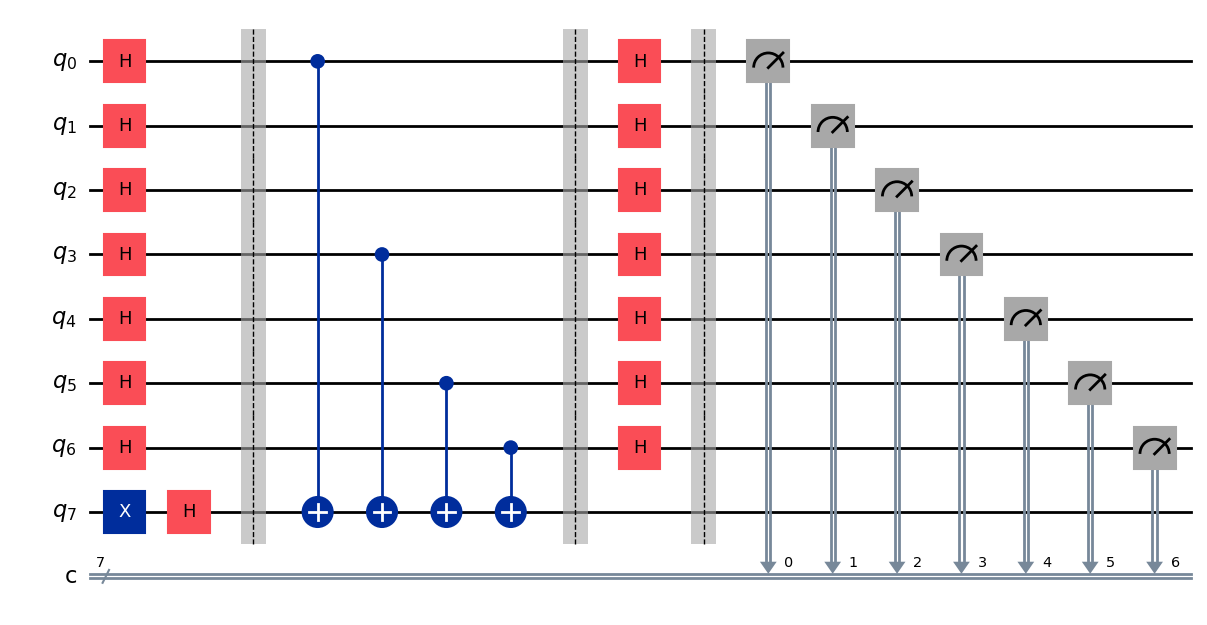

In [ ]:
circuit.barrier()
circuit.h(range(len(secretNumber)))
circuit.barrier()
circuit.measure(range(len(secretNumber)), range(len(secretNumber)))
circuit.draw('mpl',style="iqp")

## Step 6: Execute the Circuit and Interpret the Result

Measurement Result: {'1101001': 1024}


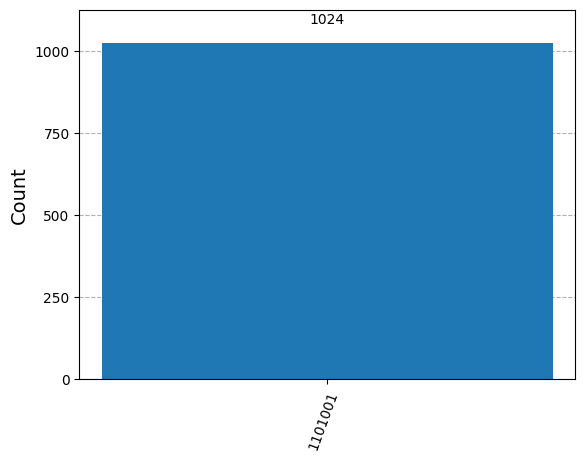

In [ ]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Create simulator backend
simulator = AerSimulator()

# Transpile and run the circuit
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# Retrieve results
counts = result.get_counts()
print("Measurement Result:", counts)

# Plot histogram
plot_histogram(counts)


## Summary

- The Bernstein–Vazirani algorithm finds a hidden binary string using just one query to a quantum oracle.
- This is more efficient than classical methods, which would require multiple queries.
- You implemented the algorithm, ran the simulation, and retrieved the secret string successfully.